In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from tqdm import tqdm
from sklearn.decomposition import PCA

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb
import lightgbm as lgb
from keras.models import Sequential
from keras.layers import Dense

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


2022-12-11 21:32:41.301122: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Read data set

In [2]:
df = pd.read_csv('data_cleaned.csv')
display(df.shape)



(334205, 18)

In [3]:
df = df.sample(n = 5000, random_state = 42)
df.head(10)

,HeartDisease,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer,VegetableAndFruits,BMI_new
178338,0,0.0,0.0,0.0,3.0,3.0,0.0,1,14.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,26.483399
201903,1,1.0,0.0,0.0,0.0,0.0,0.0,1,9.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,25.712160
105167,1,1.0,0.0,0.0,30.0,0.0,1.0,1,12.0,1.0,1.0,1.0,5.0,0.0,0.0,0.0,1.0,29.730017
282048,0,0.0,0.0,0.0,0.0,0.0,0.0,1,6.0,9.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,35.314879
148179,0,1.0,0.0,0.0,0.0,0.0,0.0,1,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,23.515411
172108,0,0.0,0.0,0.0,5.0,5.0,0.0,1,4.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,25.733823
209291,0,1.0,0.0,0.0,0.0,10.0,0.0,0,10.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,22.655567
58365,0,0.0,0.0,0.0,0.0,0.0,1.0,0,12.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,44.366285
25606,0,1.0,0.0,0.0,0.0,0.0,1.0,1,5.0,8.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,36.704430
317298,0,0.0,0.0,0.0,0.0,0.0,0.0,1,7.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,28.628196


## Some data cleaning

In [4]:
# assign none/dont know/ refused value to 0 for PhysicalHealth and MentalHealth

df.loc[(df.PhysicalHealth == 88.0),'PhysicalHealth'] = 0
df.loc[(df.PhysicalHealth == 77.0),'PhysicalHealth'] = 0
df.loc[(df.PhysicalHealth == 99.0),'PhysicalHealth'] = 0
df.loc[(df.MentalHealth == 88.0),'MentalHealth'] = 0
df.loc[(df.MentalHealth == 77.0),'MentalHealth'] = 0
df.loc[(df.MentalHealth == 99.0),'MentalHealth'] = 0
df.shape

(5000, 18)

In [5]:
# drop diabetes during  female pregnancy 

df = df[df['Diabetic'] != 2]
display(df.shape)

(5000, 18)

In [6]:
# missing value checking
df.isna().any()

HeartDisease          False
Smoking               False
AlcoholDrinking       False
Stroke                False
PhysicalHealth        False
MentalHealth          False
DiffWalking           False
Sex                   False
AgeCategory           False
Race                  False
Diabetic              False
PhysicalActivity      False
GenHealth             False
Asthma                False
KidneyDisease         False
SkinCancer            False
VegetableAndFruits    False
BMI_new               False
dtype: bool

## Split Dataset

In [7]:
X = df.drop(['HeartDisease'], axis=1)
y = df['HeartDisease']

In [8]:
# SMOTE
smo = SMOTE(random_state=1)
X_smo, y_smo = smo.fit_resample(X, y)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_smo, y_smo, random_state=42, shuffle=True)

## Benchmark

In [10]:
def evaluate_model(model, X_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(X_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate fpr, tpr, and auc
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
    auc = metrics.roc_auc_score(y_test, y_pred)

    # Display confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

In [11]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_eval = evaluate_model(log_reg, X_test, y_test)

# Print result
print('Accuracy:', log_reg_eval['acc'])
print('Precision:', log_reg_eval['prec'])
print('Recall:', log_reg_eval['rec'])
print('F1 Score:', log_reg_eval['f1'])
print('Cohens Kappa Score:', log_reg_eval['kappa'])
print('Area Under Curve:', log_reg_eval['auc'])
print('Confusion Matrix:\n', log_reg_eval['cm'])

Accuracy: 0.7668711656441718
Precision: 0.7563667232597623
Recall: 0.784330985915493
F1 Score: 0.77009507346586
Cohens Kappa Score: 0.5338085780597912
Area Under Curve: 0.7669473428704865
Confusion Matrix:
 [[859 287]
 [245 891]]


## Encoding, standardization

In [12]:
# # Only run this once

# categorical = ['Smoking','AlcoholDrinking','Stroke', 'DiffWalking', 'Sex','Race','Diabetic','PhysicalActivity','GenHealth','Asthma','KidneyDisease','SkinCancer','VegetableAndFruits', 'AgeCategory']

# transformer = make_column_transformer(
#     (OneHotEncoder(sparse=False),categorical), remainder='passthrough')

# # transform the train data
# train_transformed = transformer.fit_transform(X_train)
# train_transformed_data = pd.DataFrame(train_transformed, columns=transformer.get_feature_names())

# # Concat the two tables
# train_transformed_data.reset_index(drop=True, inplace=True)
# X_train.reset_index(drop=True, inplace=True)
# X_train = pd.concat([train_transformed_data, X_train], axis=1)

# # Remove old columns
# X_train.drop(categorical, axis = 1, inplace = True)

# X_train

In [13]:
# # Only run this once

# # Encode test data 
# test_transformed = transformer.fit_transform(X_test)
# test_transformed_data = pd.DataFrame(test_transformed, columns=transformer.get_feature_names())
# # Concat the two tables
# test_transformed_data.reset_index(drop=True, inplace=True)
# X_test.reset_index(drop=True, inplace=True)
# X_test = pd.concat([test_transformed_data, X_test], axis=1)

# # Remove old columns
# X_test.drop(categorical, axis = 1, inplace = True)
# X_test

In [14]:
# # Only run this once

scalar = MinMaxScaler()

X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

## Modelling


In [15]:
models = [
    ['Logistic Regression', LogisticRegression()],
    ['KNN', KNeighborsClassifier()],
    ['Random Forest', RandomForestClassifier()],
    ['SVM', SVC()],
    ['Decision Tree', DecisionTreeClassifier()],
    ['Gradient Boosting', GradientBoostingClassifier()],
    ['Ada Boost', AdaBoostClassifier()],
    ['Bagging', BaggingClassifier()],
    ['Extra Trees', ExtraTreesClassifier()],
    ['XGBoost', xgb.XGBClassifier()],
    ['LightGBM', lgb.LGBMClassifier()],
    ['Naive Bayes', GaussianNB()],
    ['Neural Network', MLPClassifier()],
    ['BernoulliNB', BernoulliNB()],
]

In [39]:
model_acc = {}
model_fpr = {}
model_tpr = {}
model_rec = {}

In [40]:
for n_components in [2, 4, 6, 8]:
    print("#############################################")
    print(f'when n_components is {n_components}')
    # PCA
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    # Fit the models
    for name,model in models:
        clf = model.fit(X_train_pca, y_train)
        model_eval = evaluate_model(clf, X_test_pca, y_test)
        print('Model Name:', name)
        print('Accuracy:', model_eval['acc'])
        print('Precision:', model_eval['prec'])
        print('Recall:', model_eval['rec'])
        print('F1 Score:', model_eval['f1'])
        print('Area Under Curve:', model_eval['auc'])
        print('Confusion Matrix:\n', model_eval['cm'])
        print('--------------------------------------------------')
        model_acc[name] = model_eval['acc']
        model_fpr[name] = model_eval['fpr']
        model_tpr[name] = model_eval['tpr']
        model_rec[name] = model_eval['rec']
        

#############################################
when n_components is 2
Model Name: Logistic Regression
Accuracy: 0.6914986853637161
Precision: 0.7125984251968503
Recall: 0.6373239436619719
F1 Score: 0.6728624535315986
Area Under Curve: 0.6912623208711256
Confusion Matrix:
 [[854 292]
 [412 724]]
--------------------------------------------------
Model Name: KNN
Accuracy: 0.7410166520595969
Precision: 0.7287993282955499
Recall: 0.7640845070422535
F1 Score: 0.7460249247958746
Area Under Curve: 0.7411172971511442
Confusion Matrix:
 [[823 323]
 [268 868]]
--------------------------------------------------
Model Name: Random Forest
Accuracy: 0.7532865907099036
Precision: 0.7381546134663342
Recall: 0.7816901408450704
F1 Score: 0.7592988456605387
Area Under Curve: 0.7534105154487133
Confusion Matrix:
 [[831 315]
 [248 888]]
--------------------------------------------------
Model Name: SVM
Accuracy: 0.7169149868536372
Precision: 0.7048494983277592
Recall: 0.7420774647887324
F1 Score: 0.72298456

### Tuning

In [23]:
tuning_models = [
    ['Random Forest', RandomForestClassifier()],
    ['Bagging', BaggingClassifier()],
    ['Extra Trees', ExtraTreesClassifier()],
    ['XGBoost', xgb.XGBClassifier()],
    ['LightGBM', lgb.LGBMClassifier()],
]

In [25]:
params = [
    [
        # Random Forest
        {
            'n_estimators': [100, 200, 300],
            'criterion': ['gini', 'entropy'],
        }
    ],
    [
        # Bagging
        {
            # 'n_estimators': [100, 200, 300],
            'max_samples': [0.5, 0.7, 1.0],
        }
    ],
    [
        # Extra Trees
        {
            'n_estimators': [100, 500],
            'criterion': ['gini', 'entropy'],
        }
    ],
    [
        # XGBoost
        {
            'learning_rate': [0.01, 0.1, 1],
            'gamma': [0.0, 0.2, 0.4],
        }
    ],
    [
        # LightGBM
         {
            'boosting_type': ['gbdt', 'dart', 'goss', 'rf'],
            'learning_rate': [0.01, 0.1, 1],
            'n_estimators': [100, 500],
        }
    ],
]

In [26]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=42)

In [27]:
pca = PCA(n_components=8)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

for i in range(len(tuning_models)):
    clf = GridSearchCV(tuning_models[i][1], params[i][0], cv=cv, scoring = 'accuracy', n_jobs=-1, verbose=1)
    clf.fit(X_train_pca, y_train)
    print('Model: ', tuning_models[i][0], ' Score: ', clf.best_score_, ' Params: ', clf.best_params_)
    print('------------------------')

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Model:  Random Forest  Score:  0.8817921050495731  Params:  {'criterion': 'gini', 'n_estimators': 200}
------------------------
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Model:  Bagging  Score:  0.8619223063746535  Params:  {'max_samples': 1.0}
------------------------
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Model:  Extra Trees  Score:  0.888368275814933  Params:  {'criterion': 'gini', 'n_estimators': 100}
------------------------
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Model:  XGBoost  Score:  0.8803308642924575  Params:  {'gamma': 0.0, 'learning_rate': 1}
------------------------
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /Users/runner/work/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /Users/runner/work/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /Users/runner/work/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /Users/runner/work/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /Users/runner/work/1/s/python-pac

Model:  LightGBM  Score:  0.8885130863438118  Params:  {'boosting_type': 'goss', 'learning_rate': 0.1, 'n_estimators': 500}
------------------------


## Best Model

In [28]:
estimators = [('Random Forest', RandomForestClassifier(criterion='gini', n_estimators=300)),
              ('Bagging', BaggingClassifier(max_samples=1)),
              ('XGBoost', xgb.XGBClassifier(gamma=0.0, learning_rate=1)),
              ('Extra Trees', ExtraTreesClassifier(criterion='entropy', n_estimators=100)),
              ('LightGBM', lgb.LGBMClassifier(boosting_type='goss', learning_rate=0.1, n_estimators=500))
             ]
voting = VotingClassifier(estimators=estimators, voting='soft')
voting.fit(X_train_pca, y_train)
voting_eval = evaluate_model(voting, X_test_pca, y_test)
print('Accuracy:', voting_eval['acc'])
print('Precision:', voting_eval['prec'])
print('Recall:', voting_eval['rec'])
print('F1 Score:', voting_eval['f1'])
print('Area Under Curve:', voting_eval['auc'])
print('Confusion Matrix:\n', voting_eval['cm'])

Accuracy: 0.9075372480280456
Precision: 0.8936170212765957
Recall: 0.9242957746478874
F1 Score: 0.9086975335352662
Area Under Curve: 0.907610365508935
Confusion Matrix:
 [[1021  125]
 [  86 1050]]


## Evaluation

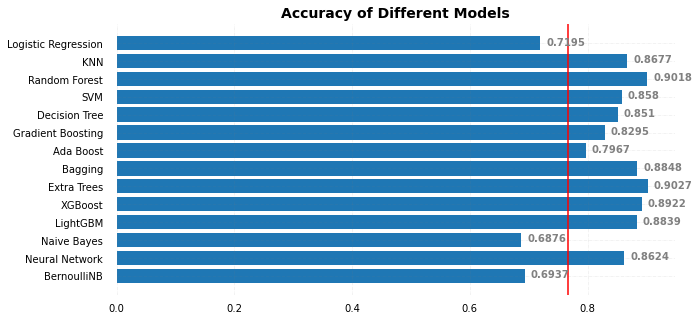

In [31]:
# Accuracy
model_name = list(model_acc.keys())
model_value = list(model_acc.values())

# Horizontal Bar Plot
fig, ax = plt.subplots(figsize=(10, 5))
ax.barh(model_name, model_value)

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.01, i.get_y()+0.5,
             str(round((i.get_width()), 4)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
    
# Add Plot Title
ax.set_title('Accuracy of Different Models', fontsize=14, fontweight='bold')

# Add benchmark line
plt.axvline(x = log_reg_eval['acc'], color = 'r', label = 'Benchmark Model')

# Show Plot
plt.show()

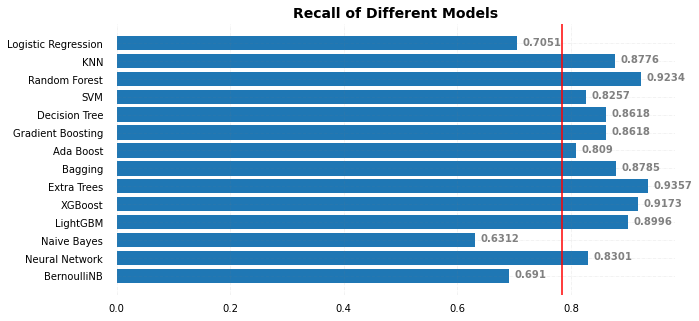

In [42]:
# Recall
model_name = list(model_rec.keys())
model_value = list(model_rec.values())

# Horizontal Bar Plot
fig, ax = plt.subplots(figsize=(10, 5))
ax.barh(model_name, model_value)

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.01, i.get_y()+0.5,
             str(round((i.get_width()), 4)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
    
# Add Plot Title
ax.set_title('Recall of Different Models', fontsize=14, fontweight='bold')

# Add benchmark line
plt.axvline(x = log_reg_eval['rec'], color = 'r', label = 'Benchmark Model')

# Show Plot
plt.show()

In [43]:
# Best Model and the top 5 Important Features


final_model = LogisticRegression()
final_model.fit(X_train, y_train)
final_eval = evaluate_model(final_model, X_test, y_test)
importance = final_model.coef_[0]

for i,v in enumerate(importance):
    if abs(v) >= 0.2:
        print(f'Feature Name: {list(X.columns)[i]}, Score: {v}')

Feature Name: Smoking, Score: 0.6036279245349383
Feature Name: AlcoholDrinking, Score: -0.4314956928143941
Feature Name: Stroke, Score: 1.0142229010430428
Feature Name: Sex, Score: 0.2874133642559713
Feature Name: AgeCategory, Score: 4.000702915215776
Feature Name: Diabetic, Score: 0.5103947523411657
Feature Name: PhysicalActivity, Score: 0.22028227157231317
Feature Name: GenHealth, Score: 2.994874310537646
Feature Name: Asthma, Score: 0.35906959000745525
Feature Name: KidneyDisease, Score: 0.8741256896362349
Feature Name: SkinCancer, Score: 0.5666022229936658
Feature Name: BMI_new, Score: -0.7923918052446352
